/var/folders/kr/ndq00w_504j48h2t8psb5mym0000gn/T/ipykernel_29366/1118707770.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[pearson] = df_filtered[pearson].apply(literal_eval)
/var/folders/kr/ndq00w_504j48h2t8psb5mym0000gn/T/ipykernel_29366/1118707770.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[pearson] = df_filtered[pearson].apply(lambda x: np.mean(x))
/var/folders/kr/ndq00w_504j48h2t8psb5mym0000gn/T/ipykernel_29366/1118707770.py:56: SettingWithCopyWarning: 
A value is

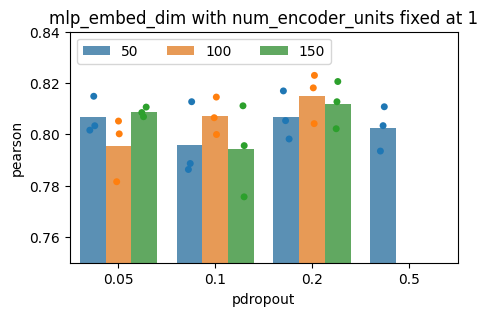

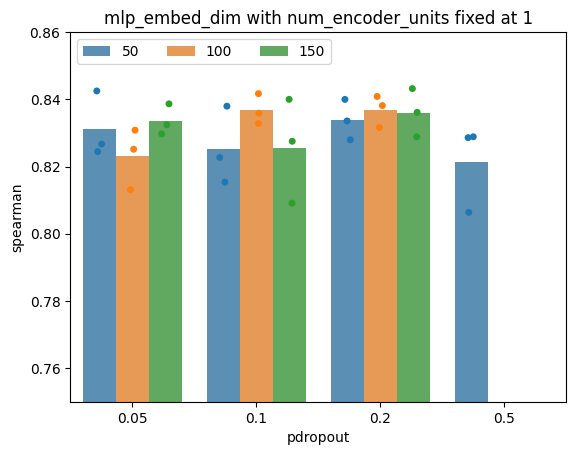

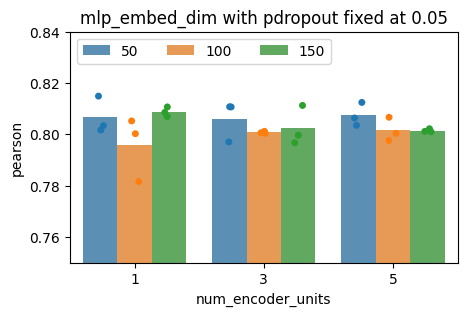

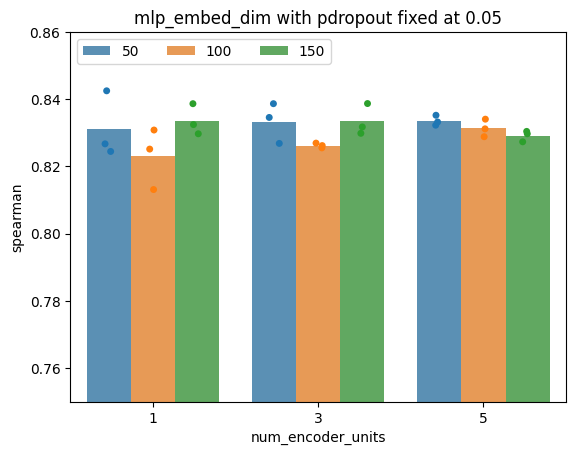

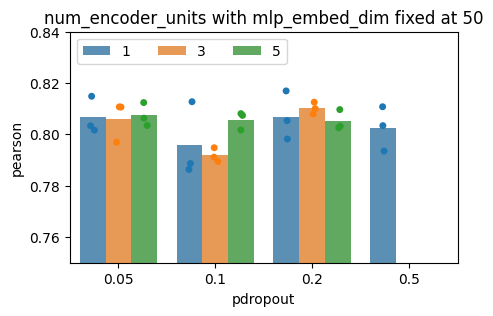

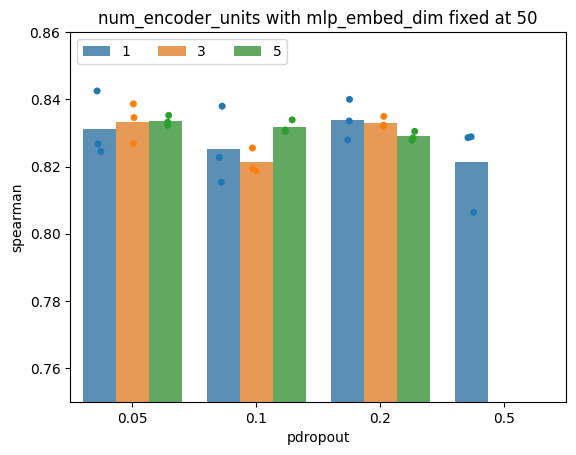

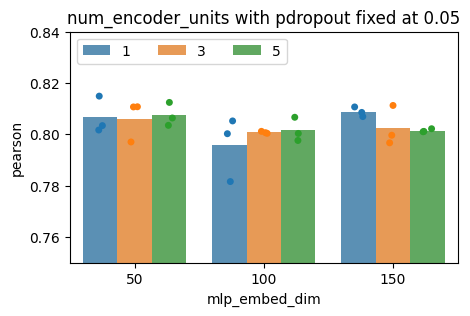

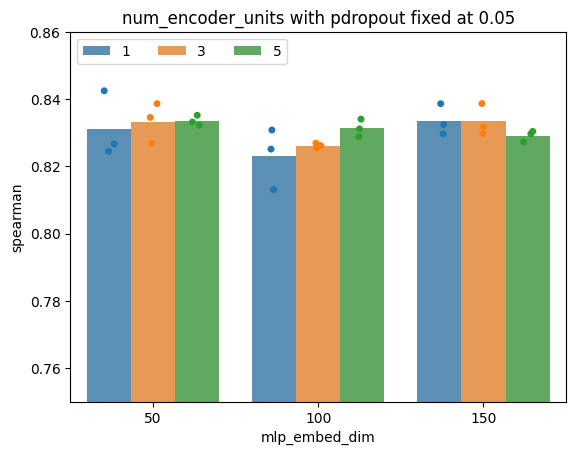

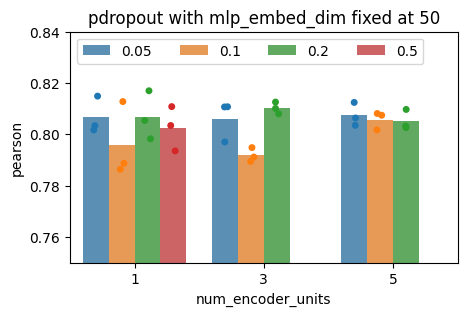

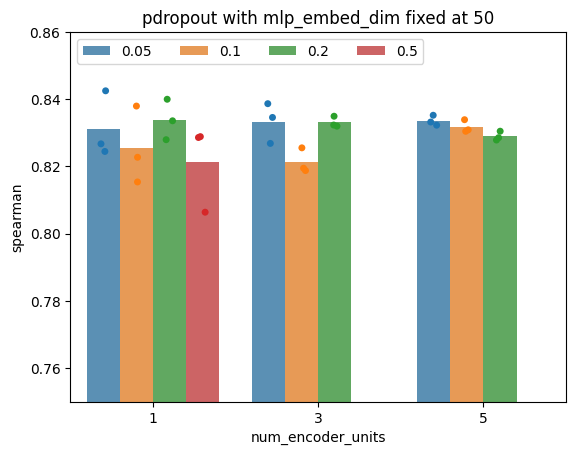

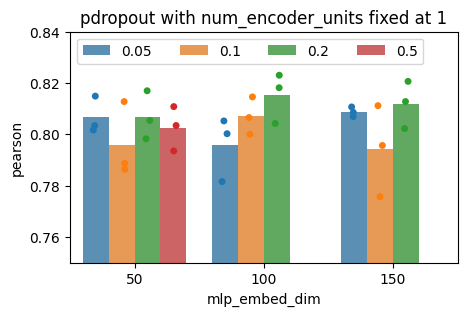

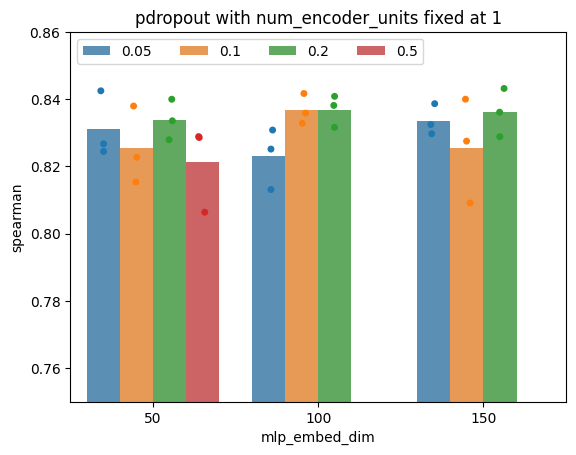

In [71]:
# Analyse the performance of transformer tuning
import pandas as pd
from os.path import join as pjoin
from ast import literal_eval
import numpy as np

data = pjoin('models', 'data', 'performance', 'transformer-train-fine-tune.csv')

df = pd.read_csv(data)
# remove the rows with nan values
df = df.dropna()

df.head()

# remove module__ prefix from the column names
df.columns = df.columns.str.replace('module__', '')

parameters = ['module__mlp_embed_dim', 'module__num_encoder_units', 'module__pdropout']
parameters = [p.replace('module__', '') for p in parameters]
pearson = 'pearson'
spearman = 'spearman'

# for each of these parameters, fix the other two and plot the performances
# for the third one, the x axis shows the values of the other two parameters
# for the y axis, show the performance, current parameter is shown using hue
import seaborn as sns
import matplotlib.pyplot as plt


for i, parameter in enumerate(parameters):
    other_parameters = [p for p in parameters if p != parameter]
    for j, other_parameter in enumerate(other_parameters):
        palette = sns.color_palette("tab10", len(df[parameter].unique()))

        fig_pearson, ax = plt.subplots(figsize=(5, 3))
        other_parameter_values = df[other_parameter].unique()
        other_parameter_value = other_parameter_values[0]
        last_parameter = [p for p in other_parameters if p != other_parameter][0]
        df_filtered = df[df[other_parameter] == other_parameter_value]
        # the performance values are lists recorded as strings, convert them to lists
        df_filtered[pearson] = df_filtered[pearson].apply(literal_eval)
        df_strip = df_filtered.copy()
        df_strip = df_strip.explode(pearson)
        df_filtered[pearson] = df_filtered[pearson].apply(lambda x: np.mean(x))
        # draw the histogram
        sns.barplot(x=last_parameter, y=pearson, hue=parameter, data=df_filtered,  dodge=True, alpha=0.8, ax=ax, palette=palette) 
        plt.title(f'{parameter} with {other_parameter} fixed at {other_parameter_value}')
        sns.stripplot(x=last_parameter, y=pearson, hue=parameter, data=df_strip, dodge=True, alpha=1, ax=ax, palette=palette, jitter=0.1, legend=False)
        # legend should be on one row
        plt.legend(loc='upper left', ncol=len(df_strip[parameter].unique()))
        ax.set_ylim(.75, .84)


        # do the same for spearman
        fig, ax = plt.subplots(figsize=(5, 3))
        df_filtered[spearman] = df_filtered[spearman].apply(literal_eval)
        df_strip = df_filtered.copy()
        df_strip = df_strip.explode(spearman)
        df_filtered[spearman] = df_filtered[spearman].apply(lambda x: np.mean(x))
        sns.barplot(x=last_parameter, y=spearman, hue=parameter, data=df_filtered,  dodge=True, alpha=0.8, ax=ax, palette=palette)
        plt.title(f'{parameter} with {other_parameter} fixed at {other_parameter_value}')
        sns.stripplot(x=last_parameter, y=spearman, hue=parameter, data=df_strip, dodge=True, alpha=1, ax=ax, palette=palette, jitter=0.1, legend=False)
        # legend should be on one row
        plt.legend(loc='upper left', ncol=len(df_strip[parameter].unique()))
        ax.set_ylim(.75, .86)

In [26]:
# Analyse the performance of transformer tuning
import pandas as pd
from os.path import join as pjoin
from ast import literal_eval
import numpy as np

data = pjoin('models', 'data', 'performance', 'transformer-train-fine-tune.csv')

df = pd.read_csv(data)
# remove the rows with nan values
df = df.dropna()
print(df)

    module__mlp_embed_dim  module__num_encoder_units  module__pdropout  \
0                      50                          1              0.05   
1                      50                          1              0.10   
2                      50                          1              0.20   
3                      50                          1              0.50   
4                      50                          3              0.05   
5                      50                          3              0.10   
6                      50                          3              0.20   
8                      50                          5              0.05   
9                      50                          5              0.10   
10                     50                          5              0.20   
12                    100                          1              0.05   
13                    100                          1              0.10   
14                    100             